In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# read data
df = pd.read_csv("data/npf_train.csv")

In [3]:
df.head()

,id,date,class4,partlybad,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,1,2000-02-23,nonevent,False,380.528120,0.802001,380.371466,0.889550,381.816207,1.292593,...,-10.730843,1.381815,-10.282754,1.870056,8.356761,4.534937,0.178084,0.123402,0.002546,0.000686
1,2,2000-03-25,Ib,False,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210
2,3,2000-04-06,Ib,False,372.363293,0.626329,372.245689,0.615803,372.847246,0.647279,...,0.991521,1.914186,1.846503,1.954748,14.286261,9.572444,0.418313,0.344386,0.000541,0.000072
3,4,2000-04-11,nonevent,False,381.437442,7.281159,381.380405,7.236002,381.926532,7.294374,...,1.753414,0.340565,2.524931,0.414255,4.945162,3.405652,0.224159,0.192014,0.003710,0.001209
4,5,2000-04-23,II,False,375.426310,3.264246,375.436524,3.110886,375.740215,3.274924,...,10.940107,2.179821,11.441893,3.048699,13.087014,9.771415,0.525591,0.476821,0.003680,0.002160


In [4]:
# delete some usuless columns
del df["date"]
del df["id"]
del df["partlybad"]
df.head()

,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,nonevent,380.528120,0.802001,380.371466,0.889550,381.816207,1.292593,380.296466,0.968884,236.605353,...,-10.730843,1.381815,-10.282754,1.870056,8.356761,4.534937,0.178084,0.123402,0.002546,0.000686
1,Ib,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,1.004164,252.480327,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210
2,Ib,372.363293,0.626329,372.245689,0.615803,372.847246,0.647279,372.193952,0.596289,269.981547,...,0.991521,1.914186,1.846503,1.954748,14.286261,9.572444,0.418313,0.344386,0.000541,0.000072
3,nonevent,381.437442,7.281159,381.380405,7.236002,381.926532,7.294374,381.381156,7.208287,68.364653,...,1.753414,0.340565,2.524931,0.414255,4.945162,3.405652,0.224159,0.192014,0.003710,0.001209
4,II,375.426310,3.264246,375.436524,3.110886,375.740215,3.274924,375.337059,2.903780,242.192619,...,10.940107,2.179821,11.441893,3.048699,13.087014,9.771415,0.525591,0.476821,0.003680,0.002160


In [5]:
df['class4'].describe()

count          430
unique           4
top       nonevent
freq           215
Name: class4, dtype: object

In [6]:
df.class4.unique()

array(['nonevent', 'Ib', 'II', 'Ia'], dtype=object)

In [22]:
# select X and y variables

X = df.loc[:, df.columns != 'class4']
y = df['class4']
y = y.replace(['nonevent', 'Ia', 'Ib', 'II'],[0, 1, 2, 3])

# Feature selection

In [11]:
from sklearn.preprocessing import StandardScaler
# data normalization function
def normalize(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

## By hand

In [12]:
def hand(X):
    # indexes to be deleted
    delidx=[]
    # loop column names
    for i,col in enumerate(X.columns):
        # Drop all .std - columns 
        if col[-4:]==".std":
            delidx.append(i)

        # Drop different altitude columns
        if col[:3]=="CO2" and col!="CO2168.mean":
            delidx.append(i)
        if col[:3]=="H20" and col != "H20168.mean":
            delidx.append(i)        
        if col[:2] == "NO" and col != "NO168.mean" and col[:3] != "NOx":
            delidx.append(i)        
        if col[:3] == "NOx" and col != "NOx168.mean":
            delidx.append(i)
        if col[:2] == "O3" and col != "O3168.mean":
            delidx.append(i)
        if col[:6] == "RHIRGA" and col != "RHIRHGA168.mean":
            delidx.append(i)
        if col[:1] == "T" and col != "T168.mean":
            delidx.append(i)
    X = X.drop(X.columns[delidx], axis=1)

    assert(len(X.columns) == 23)
    
    return X

## Recursive feature elimination

In [19]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def rfe(X, plot = False):
    # define a model
    model = RandomForestClassifier()
    # 20cross validation, eliminate one feature per iteration
    selector = RFECV(model, step=1, cv=10) 
    # Fit to the data
    selector = selector.fit(X, y)
    # Apply dimension reduction to X
    
        
    if plot:
        plt.figure(figsize=(12, 6))
        plt.title('Optimal number of features: {}'.format(selector.n_features_), fontsize=18, fontweight='bold', pad=20)
        plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
        plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
        plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_, color='#303F9F', linewidth=3)
        plt.show()
    # Apply dimension reduction to X
    return selector.transform(X)

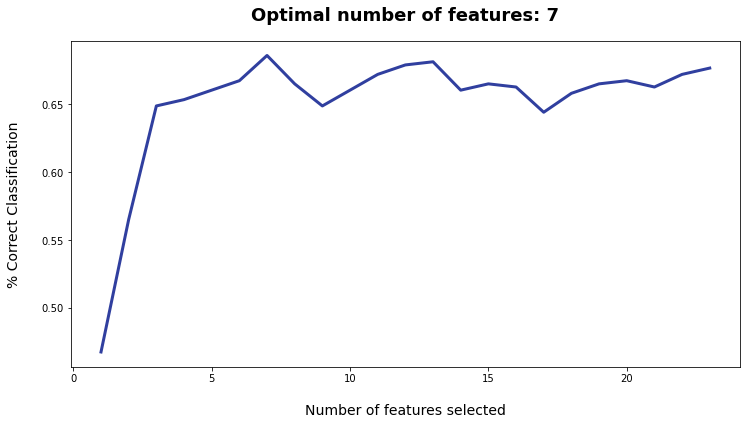

In [20]:
r = rfe(normalize(hand(X)),plot=True)

## PCA

In [29]:
from sklearn.decomposition import PCA

def pca(X, n=23):
    # Feature selection using PCA
    pca = PCA(n_components=n, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
    # fit only on training data
    pca.fit(X)
    # Apply dimensionality reduction to X
    X = pca.transform(X)
    #print("Number of features: {}".format(len(pca.components_)))
    #print('Variance ratio: \n', pca.explained_variance_ratio_)
    return X

Text(0.5, 1.0, 'Choosing the number of components for PCA')

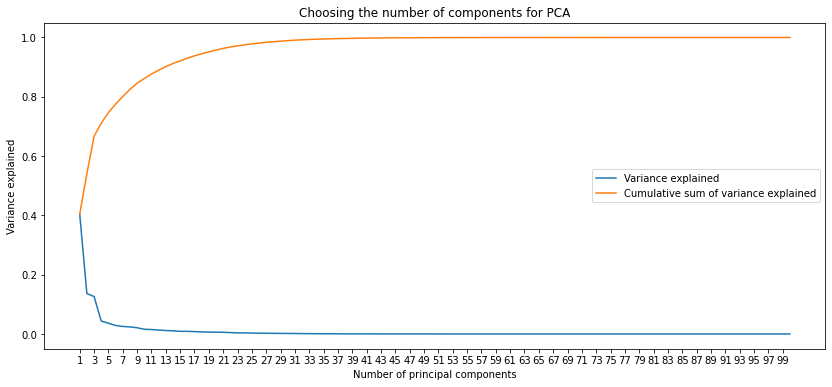

In [30]:
#Checking how many components should be in PCA

pca2=PCA()
pca2.fit_transform(normalize(X),y) #fit and transform for the normalized X
variances=pca2.explained_variance_ratio_

plt.figure(figsize=(14,6))
plt.plot(np.arange(1,len(variances)+1),variances)
plt.plot(np.arange(1,len(variances)+1),np.cumsum(variances))
plt.xticks(np.arange(1,100,2))
plt.legend(['Variance explained','Cumulative sum of variance explained'])
plt.xlabel("Number of principal components")
plt.ylabel("Variance explained")
plt.title("Choosing the number of components for PCA")

# Model selection

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


def modeling(model, X):
    cv = KFold(n_splits=10, shuffle=True)
    model = model

    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    return np.mean(scores), np.std(scores)

In [34]:
# accuracies of the models using hand selected features, pca features and rfe features(takes a while).
names = ["hand", "pca", "rfe", "default"]
# normalize after hand selecting features
selection = [normalize(hand(X)), pca(normalize(X)), rfe(normalize(X)), normalize(X)]
models = [("LR", LogisticRegression()), ("SVC", SVC()), ("RF", RandomForestClassifier()),\
          ("ET", ExtraTreesClassifier()),("DT", DecisionTreeClassifier()),("NB", GaussianNB()), \
          ("KNN", KNeighborsClassifier(n_neighbors=3)), ("LD", LinearDiscriminantAnalysis()), \
          ("QD", QuadraticDiscriminantAnalysis())]

na = []
acc = []
err = []

for i in range(len(names)):
    print("\n Feature selection: {}".format(names[i]))
    for name, model in models:
        m, s = modeling(model, selection[i])
        print(name," Accuracy: %6.3f (%6.3f)" % (m, s))
        na.append(name)
        acc.append(m)
        err.append(s)



 Feature selection: hand
LR  Accuracy:  0.670 ( 0.031)
SVC  Accuracy:  0.665 ( 0.068)
RF  Accuracy:  0.674 ( 0.062)
ET  Accuracy:  0.667 ( 0.099)
DT  Accuracy:  0.609 ( 0.046)
NB  Accuracy:  0.558 ( 0.059)
KNN  Accuracy:  0.651 ( 0.066)
LD  Accuracy:  0.660 ( 0.057)
QD  Accuracy:  0.644 ( 0.074)

 Feature selection: pca
LR  Accuracy:  0.640 ( 0.081)
SVC  Accuracy:  0.658 ( 0.092)
RF  Accuracy:  0.619 ( 0.067)
ET  Accuracy:  0.637 ( 0.035)
DT  Accuracy:  0.579 ( 0.062)
NB  Accuracy:  0.502 ( 0.074)
KNN  Accuracy:  0.598 ( 0.060)
LD  Accuracy:  0.642 ( 0.079)
QD  Accuracy:  0.560 ( 0.072)

 Feature selection: rfe
LR  Accuracy:  0.670 ( 0.055)
SVC  Accuracy:  0.688 ( 0.076)
RF  Accuracy:  0.695 ( 0.051)
ET  Accuracy:  0.658 ( 0.077)
DT  Accuracy:  0.616 ( 0.074)
NB  Accuracy:  0.607 ( 0.050)
KNN  Accuracy:  0.630 ( 0.061)
LD  Accuracy:  0.658 ( 0.030)
QD  Accuracy:  0.651 ( 0.042)

 Feature selection: default
LR  Accuracy:  0.651 ( 0.057)
SVC  Accuracy:  0.663 ( 0.063)
RF  Accuracy:  0.6

# Predictions

In [55]:
# read in data
df_test = pd.read_csv("data/npf_test_hidden.csv")
df_test.head(5)

,id,date,class4,partlybad,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,431,NaN,NaN,False,377.448880,2.920241,377.632640,2.666835,377.908080,3.440430,...,18.421232,2.267065,19.059027,2.320316,12.572064,9.623161,0.645959,0.558320,0.006159,0.000797
1,432,NaN,NaN,False,369.589091,0.210402,369.632955,0.201409,369.904200,0.252167,...,-0.036312,0.180361,0.476219,0.192571,1.479447,0.640776,0.028665,0.013506,0.000361,0.000031
2,433,NaN,NaN,False,380.338929,0.928028,380.315833,0.917636,380.550119,0.936683,...,1.284980,0.379219,1.737849,0.365878,0.720849,0.427279,0.015179,0.010471,0.002334,0.000347
3,434,NaN,NaN,False,381.047644,1.290080,381.231149,1.245494,381.358678,1.817869,...,10.298284,3.281097,11.148552,3.478676,19.568691,14.480491,0.783038,0.703191,0.001868,0.000594
4,435,NaN,NaN,False,371.620857,8.552564,371.245461,7.605137,373.101151,10.027695,...,8.398302,1.479949,8.798417,1.900331,7.591540,4.579817,0.319340,0.247098,0.002649,0.000701


In [56]:
# delete some usuless columns
del df_test["date"]
del df_test["id"]
del df_test["partlybad"]
del df_test["class4"]

# declare X_test
X_test = df_test
X_test.head()

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,377.448880,2.920241,377.632640,2.666835,377.908080,3.440430,377.708240,2.543418,210.851946,179.668211,...,18.421232,2.267065,19.059027,2.320316,12.572064,9.623161,0.645959,0.558320,0.006159,0.000797
1,369.589091,0.210402,369.632955,0.201409,369.904200,0.252167,369.601600,0.184727,25.017625,15.296680,...,-0.036312,0.180361,0.476219,0.192571,1.479447,0.640776,0.028665,0.013506,0.000361,0.000031
2,380.338929,0.928028,380.315833,0.917636,380.550119,0.936683,380.301446,0.916970,8.283964,5.107894,...,1.284980,0.379219,1.737849,0.365878,0.720849,0.427279,0.015179,0.010471,0.002334,0.000347
3,381.047644,1.290080,381.231149,1.245494,381.358678,1.817869,381.290057,1.228278,380.881093,280.914521,...,10.298284,3.281097,11.148552,3.478676,19.568691,14.480491,0.783038,0.703191,0.001868,0.000594
4,371.620857,8.552564,371.245461,7.605137,373.101151,10.027695,370.722624,6.804409,130.514702,79.959508,...,8.398302,1.479949,8.798417,1.900331,7.591540,4.579817,0.319340,0.247098,0.002649,0.000701


In [57]:
clf = LogisticRegression(penalty='l2', 
                           dual=False, 
                           tol=0.0001, 
                           C=1.0, 
                           fit_intercept=True, 
                           intercept_scaling=1, 
                           class_weight=None, 
                           random_state=None, 
                           solver='lbfgs', 
                           max_iter=100, 
                           multi_class='auto', 
                           verbose=0, 
                           warm_start=False, 
                           n_jobs=None, 
                           l1_ratio=None)

# normalize training and test data
X = normalize(X)
X_test = normalize(X_test)

# fit rfe model with training data, and transform training and test data
model = RandomForestClassifier()
selector = RFECV(model, step=1, cv=10) 
selector = selector.fit(X, y)
selector.transform(X)
selector.transform(X_test)

# train the logistic regression model
# and do the predictions
clf.fit(X, y)
pred = clf.predict(X_test)
prob = clf.predict_proba(X_test)
print(pred)
print(prob)

[0 1 0 2 3 1 0 3 3 3 3 3 2 3 3 2 3 0 0 3 3 3 3 3 2 2 0 0 3 0 3 3 0 3 0 0 0
 2 0 0 3 3 0 0 0 3 2 2 2 3 0 0 0 0 0 0 3 0 0 3 3 0 3 0 0 2 2 2 3 0 1 0 2 0
 0 0 0 2 0 2 2 0 0 3 3 3 2 3 3 0 3 0 3 0 0 2 0 0 0 2 0 0 0 3 0 2 2 2 0 3 2
 3 3 2 2 0 0 3 0 0 3 1 2 2 0 0 0 3 0 1 0 3 0 0 0 0 0 2 2 3 1 0 0 3 2 0 0 1
 0 2 0 0 0 1 0 0 3 3 0 0 0 0 2 2 0 1 3 1 2 3 2 0 0 3 0 3 0 2 3 0 0 3 0 0 0
 0 2 0 0 0 0 3 0 0 2 2 3 0 3 0 2 3 2 3 2 3 0 0 0 3 3 0 0 0 1 0 2 3 2 0 0 3
 0 0 0 3 0 0 3 3 2 3 0 0 3 0 2 1 1 0 0 3 2 0 0 0 3 3 3 0 3 3 0 2 0 2 0 1 0
 2 2 0 0 0 1 0 2 1 2 0 0 0 0 3 0 2 0 2 0 0 0 3 2 0 2 0 2 3 3 0 0 0 3 0 0 0
 2 2 0 3 3 0 2 0 0 0 0 0 3 0 0 2 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 3 3 0 0
 0 0 0 2 0 0 2 0 2 0 0 0 0 1 2 0 0 3 0 0 0 3 2 3 0 0 0 3 3 0 3 3 2 2 3 3 0
 0 3 3 0 0 0 0 3 0 2 3 2 0 2 3 0 0 2 0 0 0 0 0 3 1 2 0 2 0 3 0 0 1 0 2 0 0
 0 0 0 0 0 0 0 0 2 0 3 2 0 2 0 2 3 0 0 2 0 0 0 0 0 2 2 0 0 3 0 0 1 3 0 2 0
 3 3 3 0 2 3 0 0 3 3 3 0 0 0 0 3 3 3 0 3 3 3 0 0 0 0 3 2 2 0 0 0 0 0 0 0 2
 1 2 0 3 1 0 3 2 0 0 0 0 

/home/eiroine/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
# calculate the propability for an event
for i in range(len(prob)):
    prob_event[i] = (prob[i,1] + prob[i,2] + prob[i,3])
    
# clf.classes_   # shows witch order the probabilities are in

# store results in data Frame
answers = pd.DataFrame(np.transpose((pred, np.transpose(prob_event))), columns = ['class4', 'p'])
#answers.head()

#  name the classes
answers['class4'] = answers['class4'].replace([0, 1, 2, 3], ['nonevent', 'Ia', 'Ib', 'II'])

# make csv
answers.to_csv('data/answers.csv', index=False)

## Somehow add the binary class accuracy estimate on the first row